In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from bokeh.io import output_notebook
from importlib import reload
%matplotlib inline

import moving_average as ma
import utility

In [2]:
output_notebook

<function bokeh.io.output.output_notebook>

In [3]:
data = pd.read_csv('fx_data/DAT_ASCII_USDJPY_M1_2017.csv', sep=';', header=None)
data.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)
data = data.set_index('time')
del data['volume']

In [4]:
reload(ma)

<module 'moving_average' from '/home/ryohayama/Python/FinancialAnalysis/technicals/moving_average.py'>

In [5]:
sma = ma.SMA(data['close'], period=2000)
ema = ma.EMA(data['close'], period=2000)

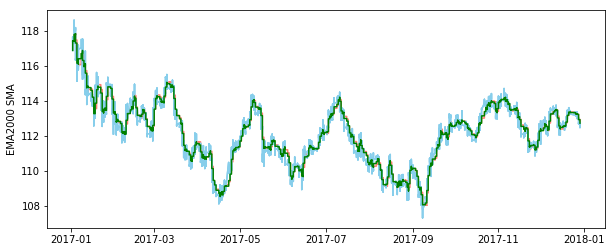

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sma.plot(ax=ax)
ema.plot(ax=ax, color2='green')

In [7]:
%%time
agg = utility.aggregate_periods(data, period=60)

CPU times: user 4.51 s, sys: 6.24 ms, total: 4.52 s
Wall time: 4.52 s


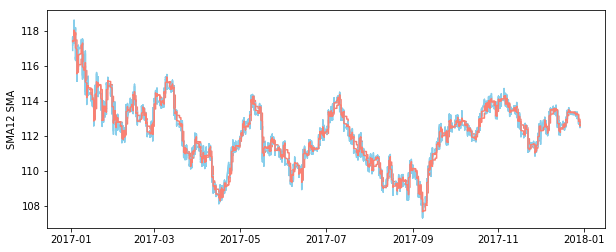

In [8]:
sma1 = ma.SMA(agg['close'], period=12)
ema1 = ma.EMA(agg['close'], period=12)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sma.plot(ax=ax)
sma1.plot(ax=ax)
#ema1.plot(ax=ax, color2='green')

In [45]:
len(data)

371298

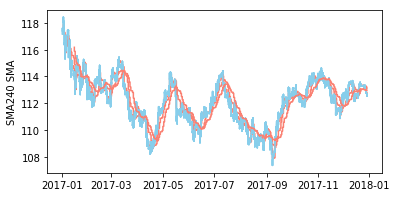

In [51]:
reload(ma)
collection = ma.MACollection(agg['close'], periods=[24, 120, 240])
collection.plot()

In [10]:
agg15 = utility.aggregate_periods(data, period=15)

In [36]:
reload(utility)

<module 'utility' from '/home/ryohayama/Python/FinancialAnalysis/technicals/utility.py'>

In [37]:
utility.plot_candlestick(data[:100])

Loading BokehJS ...

In [22]:
a = agg15.index[0]
b = agg15.index[1]

In [23]:
a, b

(Timestamp('2017-01-02 02:15:00'), Timestamp('2017-01-02 02:31:00'))

In [29]:
(b - a).seconds * 1000

960000